In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
import tensorflow as tf

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189


In [ ]:
X_train.shape

(25000,)

In [ ]:
y_train.shape

(25000,)

In [ ]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 1668, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 2, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 2, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 2, 2, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 2, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 2, 185, 132, 1988, 2, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 9

In [ ]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
max_review_length = 600
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [4368, 1133,    2, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846,    2],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [ ]:
X_test.shape

(25000, 600)

In [ ]:
embedding_vector_length = 32

model = Sequential()

model.add(Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           160032    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 76s 176ms/step - loss: 0.4794 - accuracy: 0.7630 - val_loss: 0.3503 - val_accuracy: 0.8566
Epoch 2/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3464 - accuracy: 0.8568 - val_loss: 0.3468 - val_accuracy: 0.8559
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 0.2741 - accuracy: 0.8904 - val_loss: 0.3150 - val_accuracy: 0.8633
Epoch 4/10
391/391 [==============================] - 20s 51ms/step - loss: 0.2246 - accuracy: 0.9133 - val_loss: 0.3146 - val_accuracy: 0.8720
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.2233 - accuracy: 0.9124 - val_loss: 0.3224 - val_accuracy: 0.8723
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 0.1705 - accuracy: 0.9362 - val_loss: 0.3389 - val_accuracy: 0.8726
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 0.1523 - accuracy: 0.9422 - val_loss: 0.4303 - val_accuracy

In [ ]:
history.history

{'loss': [0.4793962836265564,
  0.34639352560043335,
  0.27414843440055847,
  0.22456689178943634,
  0.22331014275550842,
  0.17054884135723114,
  0.15234342217445374,
  0.13155844807624817,
  0.10788007080554962,
  0.11554471403360367],
 'accuracy': [0.7629600167274475,
  0.8567600250244141,
  0.8904399871826172,
  0.913320004940033,
  0.9124000072479248,
  0.936240017414093,
  0.9422399997711182,
  0.9521600008010864,
  0.9614400267601013,
  0.9582800269126892],
 'val_loss': [0.3503130376338959,
  0.3468082845211029,
  0.3150080740451813,
  0.314615935087204,
  0.3224191665649414,
  0.3388521075248718,
  0.4303349256515503,
  0.38500452041625977,
  0.45500171184539795,
  0.46190693974494934],
 'val_accuracy': [0.8565999865531921,
  0.8558800220489502,
  0.8632799983024597,
  0.8720399737358093,
  0.8723199963569641,
  0.8726000189781189,
  0.8556399941444397,
  0.8627200126647949,
  0.8550000190734863,
  0.8632400035858154]}

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.32%


In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

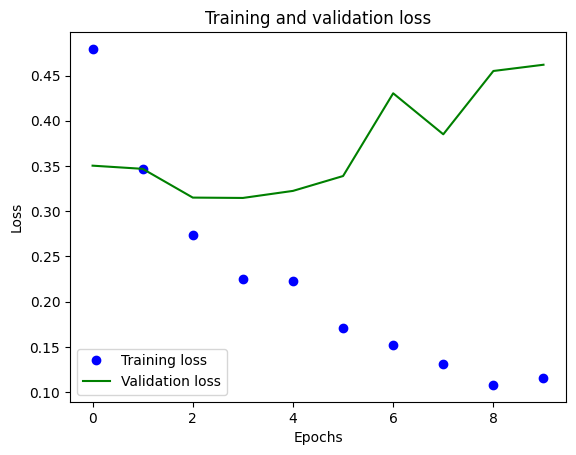

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

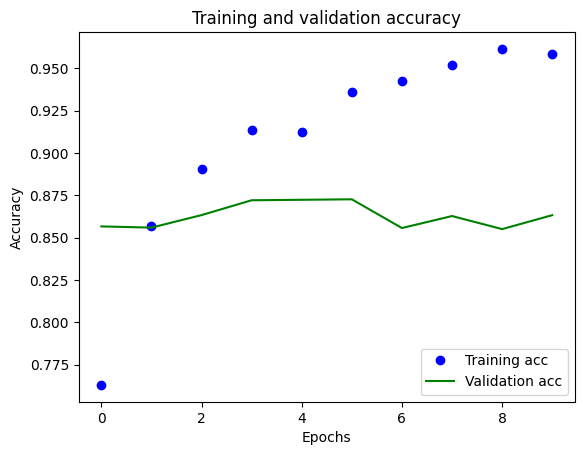

In [ ]:
plt.plot(accuracy, 'bo', label='Training acc')
plt.plot(val_accuracy, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()